<h1>Resumen capitulo 1</h1>
aplicando los conceptos en los dataset de 'cars' y 'iris'.

In [83]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [37]:
df = pd.read_csv('../../Downloads/cars2.csv')
df.head(5)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [38]:
df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
dtype: object

In [40]:
#media
df.price_usd.mean()

6639.971021255604

<AxesSubplot:ylabel='Frequency'>

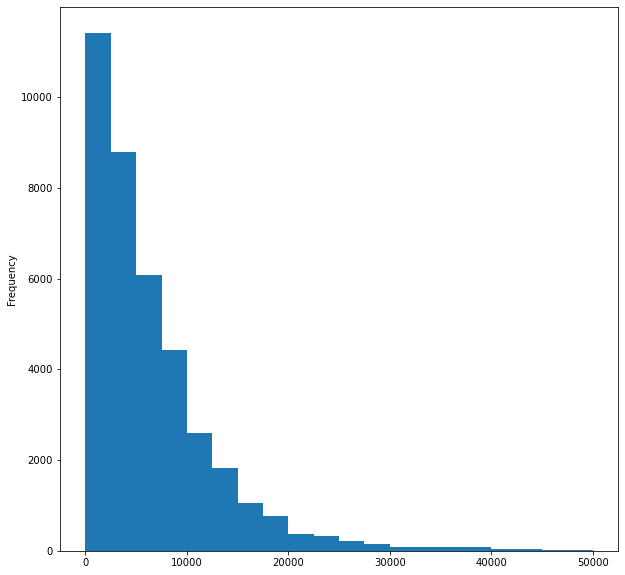

In [42]:
plt.figure(figsize=(10,10))
df.price_usd.plot.hist(bins=20)

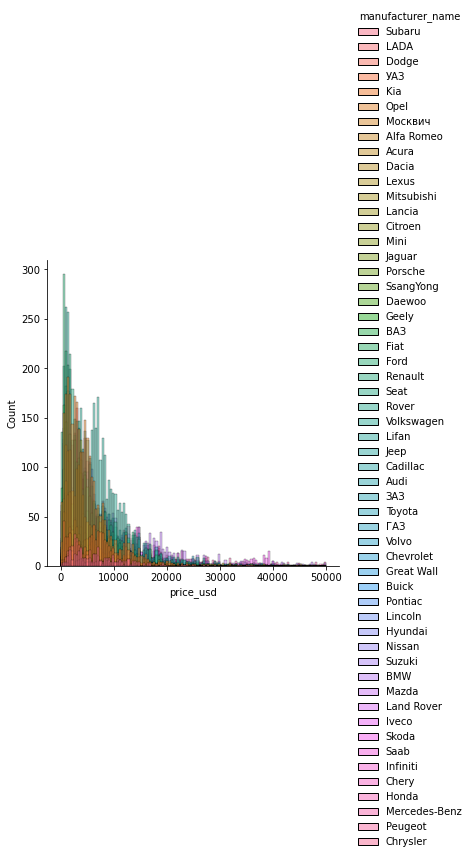

In [43]:
#distribution manufacturer name 
sns.displot(df,x='price_usd',hue='manufacturer_name')

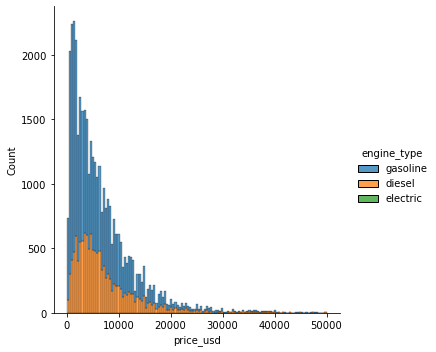

In [45]:
sns.displot(df,x='price_usd',hue='engine_type',multiple='stack')

In [46]:
df.manufacturer_name.unique()

array(['Subaru', 'LADA', 'Dodge', 'УАЗ', 'Kia', 'Opel', 'Москвич',
       'Alfa Romeo', 'Acura', 'Dacia', 'Lexus', 'Mitsubishi', 'Lancia',
       'Citroen', 'Mini', 'Jaguar', 'Porsche', 'SsangYong', 'Daewoo',
       'Geely', 'ВАЗ', 'Fiat', 'Ford', 'Renault', 'Seat', 'Rover',
       'Volkswagen', 'Lifan', 'Jeep', 'Cadillac', 'Audi', 'ЗАЗ', 'Toyota',
       'ГАЗ', 'Volvo', 'Chevrolet', 'Great Wall', 'Buick', 'Pontiac',
       'Lincoln', 'Hyundai', 'Nissan', 'Suzuki', 'BMW', 'Mazda',
       'Land Rover', 'Iveco', 'Skoda', 'Saab', 'Infiniti', 'Chery',
       'Honda', 'Mercedes-Benz', 'Peugeot', 'Chrysler'], dtype=object)

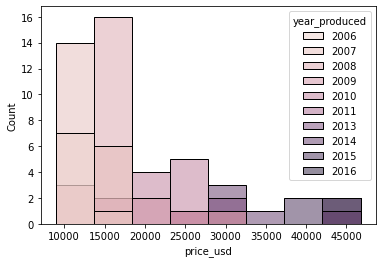

In [48]:
q7 = df[(df['manufacturer_name']=='Audi') & (df['model_name']=='Q7')]
sns.histplot(q7,x='price_usd',hue='year_produced')
plt.show()

<h2>Deteccion de outliers</h2>

In [53]:
iqr = df['price_usd'].quantile(0.75) - df['price_usd'].quantile(0.25)
iqr

#liminte minimo
minlimit = df['price_usd'].quantile(0.25) - 1.5 * iqr
maxlimit = df['price_usd'].quantile(0.75) + 1.3 * iqr

print(f'limite minimo : {minlimit} , limite maximo : {maxlimit}')

limite minimo : -8235.0 , limite maximo : 17947.0


<AxesSubplot:xlabel='price_usd'>

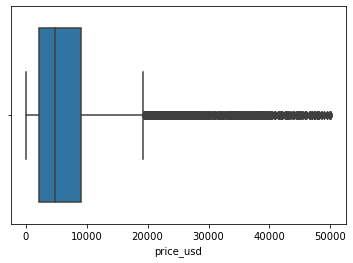

In [55]:
sns.boxplot(data=df,x='price_usd')

<AxesSubplot:xlabel='engine_fuel', ylabel='price_usd'>

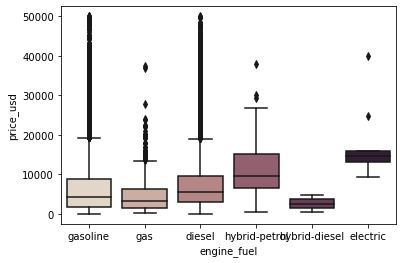

In [50]:
sns.boxplot(data=df,x='engine_fuel',y='price_usd',palette='ch:.25')

<h2>Exploracion visual de los datos</h2>

In [56]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv('../../Downloads/iris.csv')
df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [58]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal.length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal.width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


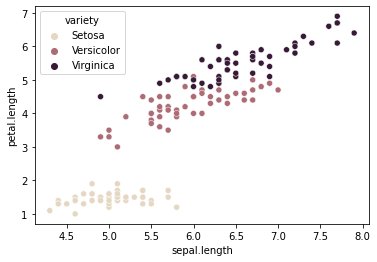

In [60]:
#diagrama de dispersion de los datos 
#tomando el alto del sepalo y alto de petalo.

sns.scatterplot(data=df,x='sepal.length',y='petal.length',hue='variety',palette='ch:.25')
plt.show()

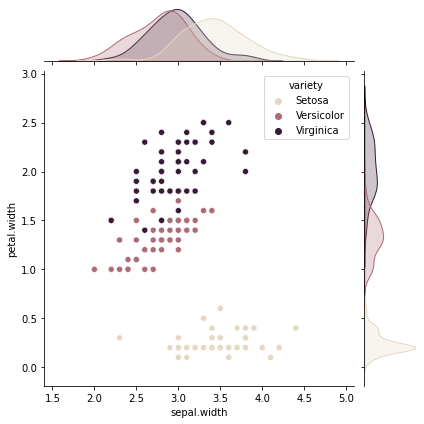

In [61]:
#un joinplot muestra un scatterplot y las distrubucion de los datos
sns.jointplot(data=df,x='sepal.width',y='petal.width',hue='variety',palette='ch:.25')

<AxesSubplot:xlabel='variety', ylabel='sepal.length'>

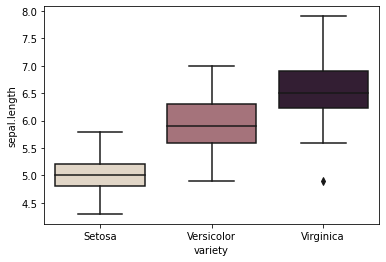

In [62]:
sns.boxplot(data=df,x='variety',y='sepal.length',palette='ch:.25')

<h2>Correlaciones: covarianza y coeficiente de correlacion.</h2>
<br>
si dos variables estan correlacionadas, esta aportando la misma informaciones, por lo que no seria util tener las 2 variables en el modelo si su correlacion es muy alta.
<br>
<br>
la forma de encontrar correlaciones es usando la covarianza.

<img src='https://deepnote.com/publish/cfa882b6-c07f-43fe-9901-1c2e471ce120/c6c89a47-2f8b-4786-850b-f09ac90cac9f/file?path=%2Fimages%2Fimage-20210609-111204.png' />
<br>
pero como la escala de X y Y pueden ser distintas, entonces se usa el coeficiente de correlacion(p):
<img src='https://deepnote.com/publish/cfa882b6-c07f-43fe-9901-1c2e471ce120/c6c89a47-2f8b-4786-850b-f09ac90cac9f/file?path=%2Fimages%2Fimage-20210609-111237.png' />
<br>
mientras mas alto sea el foeficiente de correlacion(mas cercano a 1),mas alta es la correlacion y viceversa(mas cercano a 0), y si el valor es cercno a -1, entonces hay una correlacion inversa.

<h2>Matriz de covarianza</h2>
<br>
cuando hay muchas variables se debe calcular todas las posibles covarianzas de las pareja de datos del dataset. El resultado de este calculo, representado en un amtriz, es la matriz de covarianza.
<br>
<br>
siempre se usa en los analisis exploratorios de datos.

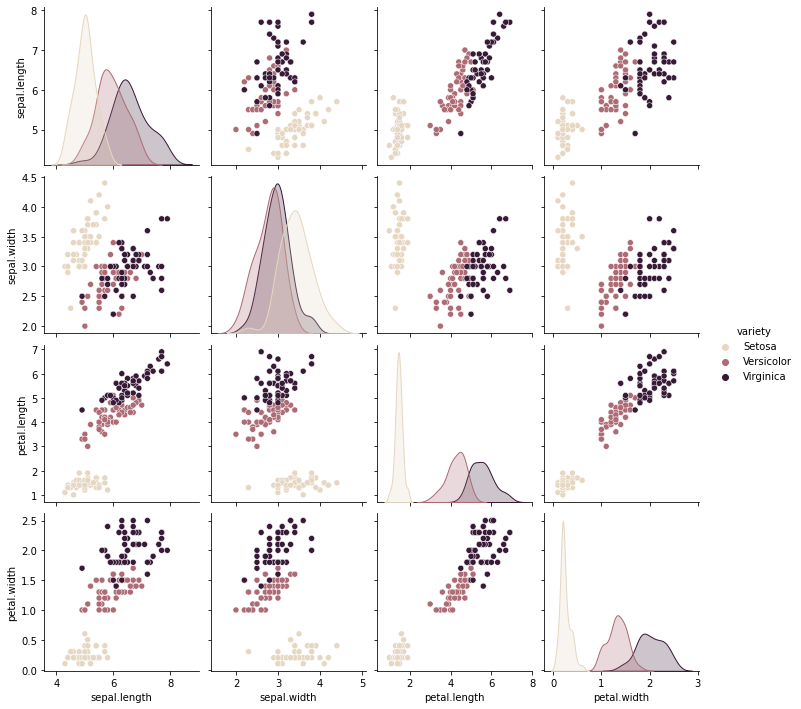

In [64]:
#matriz de covariancia

#este grafico no sirve si hay dms variables a revisar

sns.pairplot(df,hue='variety',palette='ch:.25')
plt.show()

In [77]:
#matriz de correlacion

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(
    df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
)

scaled.T

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

In [78]:
covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

<AxesSubplot:>

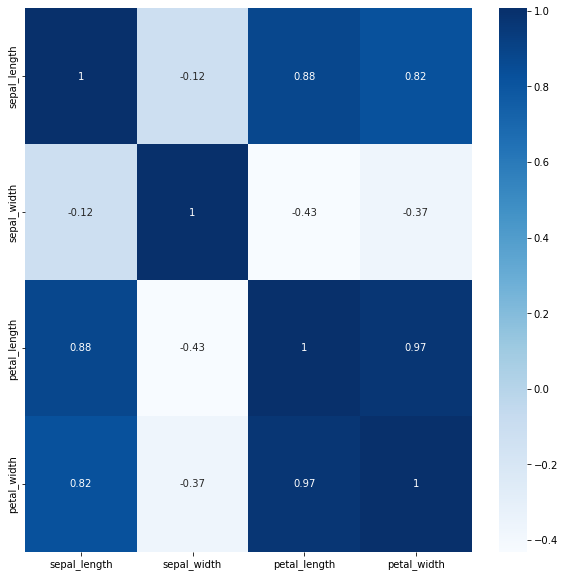

In [82]:
plt.figure(figsize=(10,10))
sns.heatmap(covariance_matrix,annot=True,yticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                 xticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],cmap='Blues')